## Riassunto Libreria Pandas

In [0]:
# importare libreria pandas con nome pd
import pandas as pd

In [0]:
# Creare dataframe (usando struttura dizionario chiave-valore)
content ={
    "Nome": ["Manuel", "Giada", "Marco", "Manuel"],
    "Età" : ["26", "25", "28", "29"],
    "Sesso": ["M", "F", "M", "F"],
    "Stipendio": [2050,1900,2100,2300]
}
df = pd.DataFrame(content)
# Ê possibile specificare anche gli indici in modo che siano diversi da 0,1,2 --N
#df = pd.DataFrame(content, index=["n1","n2","n3","n4"])
df

In [0]:
# Elencare informazioni
df.info()

In [0]:
# Elencare informazioni statistiche utili
display(df.describe())
df["Età"]=pd.to_numeric(df["Età"])
display(df.describe())

In [0]:
# Elencare nome colonne
df.keys()

In [0]:
# Dimensione tabella (righe,colonne)
df.shape
row = df.shape[0]
col = df.shape[1]
print(df.shape,row,col)

In [0]:
# Ottenere prime  3 e ultime 3 righe della tabella
display(df.head(3)) # prime 3
display(df.tail(3)) # ultime 3

In [0]:
# Seleziona colonna Nome e Sesso
df[["Nome","Sesso"]]

In [0]:
# Seleziona colonna Nome e Sesso parole unique
display(df["Nome"].unique())
display(df["Sesso"].unique())

In [0]:
# Seleziona riga con indice 2
display(df.iloc[2])
# Seleziona riga con indice 2,3
display(df.iloc[[2,3]])
# Seleziona riga da 1 a 3
display(df.iloc[1:4])

In [0]:
# Della colonna Nome e Sesso selezionare le righe  1 e 3
df[["Nome","Sesso"]].iloc[[1,3]]

In [0]:
# Della colonna Nome e Sesso selezionare le righe da 1 a 3
df[["Nome","Sesso"]].iloc[1:4] # se vogliamo anche il 3 compreso dobbiamo arrivare a 4

In [0]:
# Seleziona tutte righe dove la colonna Sesso è uguale a F
display(df[df["Sesso"]=="F"])
# Seleziona l'indice della prima riga dove la colonna Sesso è uguale a F
display(df[df["Sesso"]=="F"].index[1])

In [0]:
# Seleziona tutte le righe dove la colonna età è > 26
df[df["Età"]>26] # Attenzione "26" è una stringa

In [0]:
# Seleziona tutte le righe dove la colonna età è > 26
df[df["Età"]>26] # Attenzione 26 è un numero adesso

In [0]:
# Plot 
#df.plot(kind="bar",stacked=True,figsize=(18,8)) # Grafico uno sopra l'latro
#df.plot(kind="bar",stacked=False,figsize=(18,8)) # Grafico a bar uno di fianco all'altro
df.plot(kind="line",figsize=(18,8)) # Grafico a bar uno di fianco all'altro

In [0]:
# Salvare dataframe come csv
df.to_csv('nome.csv', index=False,sep=',') # specificare se si vuole o no salvare l'indice
# Consiglio alcune volte è meglio usare ; come separatore. Vecchi excel funzionano meglio.

In [0]:
# Leggere csv file e convertirlo in dataframe
data = pd.read_csv('nome.csv')
data

In [0]:
# Salvare dataframe su excel
df.to_excel('nome.xlsx', index=False)

In [0]:
# Leggere excel file e convertirlo in dataframe
data = pd.read_excel('nome.xlsx')
data

In [0]:
# Ordinare tabella specificando una colonna e l'ordine crescente/decrescente
df = df.sort_values(by="Età", ascending=True) # crescente
display(df)
df.sort_values(by="Età",ascending=False, inplace=True) # decrescente
df

In [0]:
# Resettare l'ordine degli indici
df.reset_index(inplace=True)
df

In [0]:
# Aggiungere una colonna alla fine
df["Nuova Colonna"] = ["a","b","c","d"] # numero di elementi = numero di righe
# Aggiungere una colonna in una precisa posizione
df.insert(3, "Nuova Colonna 2", ["aa","bb","cc","dd"]) 
display(df)

In [0]:
# Rimuovere una colonna usando i nomi delle colonne
df.drop(columns=["Nuova Colonna 2", "Nuova Colonna"], inplace=True)
df

In [0]:
# Rimuovere righe 0 e 2 in base agli indici
df.drop(index=[0,2],inplace=True)
df

In [0]:
# Operazioni con stringhe: replace (sostituire)
df["Nome"].str.replace("a",",")
#df["Nome"] = df["Nome"].str.replace("e",",") # assegnamento
#df

In [0]:
# Operazione con stringhe: contains (contine)
# Nella colonna Nome e Sesso trova tutti i valori con  le lettere F o M mauscole
#df[df["Nome"].str.contains("F|M") | df["Sesso"].str.contains("M")]
# Nella colonna Nome e Sesso trova tutti i valori con  le lettere G e F mauscole
df[df["Nome"].str.contains("G") & df["Sesso"].str.contains("F")]

## Esercizio

### Descrizione

Datasets:
* dati_province = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
* dati_regioni = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
* dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

Obbiettivo: Utilizzando i dati provinciali analizzare l'andamento dei contagiati nella propria provincia nel tempo.

1. Plottare l'andamento nel tempo dei contagiati della propria provincia. 
2. Comparare l'andamento nel tempo dei contagiati delle prime 3 provincie della nostra regione (Emilia-Romagna) con quelli  di una provincia appartenente sempre alla nostra regione.
3. Creare un grafico a torta con le percentuali di contagiati per ogni provincia apparente alla nostra regione (Emilia-Romagna) 


### Parte 1. Plottare l'andamento nel tempo dei contagiati della propria provincia. 

In [0]:
# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df

In [0]:
df.info()

In [0]:
# Estrarre i nomi delle regioni
df["denominazione_regione"].unique()
#list(df["denominazione_regione"].unique())

In [0]:
# Estrarre i nomi delle provincie e manipolazione liste
mylist = list(df["denominazione_provincia"].unique())
print(mylist)
el = "In fase di definizione/aggiornamento"	
if el in mylist:
    print("Yes: e l'indice `e", mylist.index(el))
else:
    print("No")

In [0]:
#Estrarre le provincie in Emilia Romagna
df[df["denominazione_regione"]=="Emilia-Romagna"]["denominazione_provincia"].unique()

In [0]:
# Creaiamo un dataframe che contiene solo la regione Emilia Romagna e la pronvincia Bologna
prov_list = ["Bologna", "Rimini", "Parma"] 
df_choice = df[ (df["denominazione_regione"]=="Emilia-Romagna") & (df["denominazione_provincia"]==prov_list[0])]
df_choice.head()

In [0]:
# Guardiamo il tipo dei dati 
# Controlliamo se i numeri sono interi o float
df_choice.info()

In [0]:
# Convertiamo il tipo data in datetime e manipoliamola
#temp = pd.to_datetime(df_choice["data"])
df_choice["data"] = temp.dt.date
print(temp.head(1))
print(temp.head(1).dt.date)
print(temp.head(1).dt.year)
print(temp.head(1).dt.strftime('%m-%d'))

#### Pandas Plot (Matplotlib based)

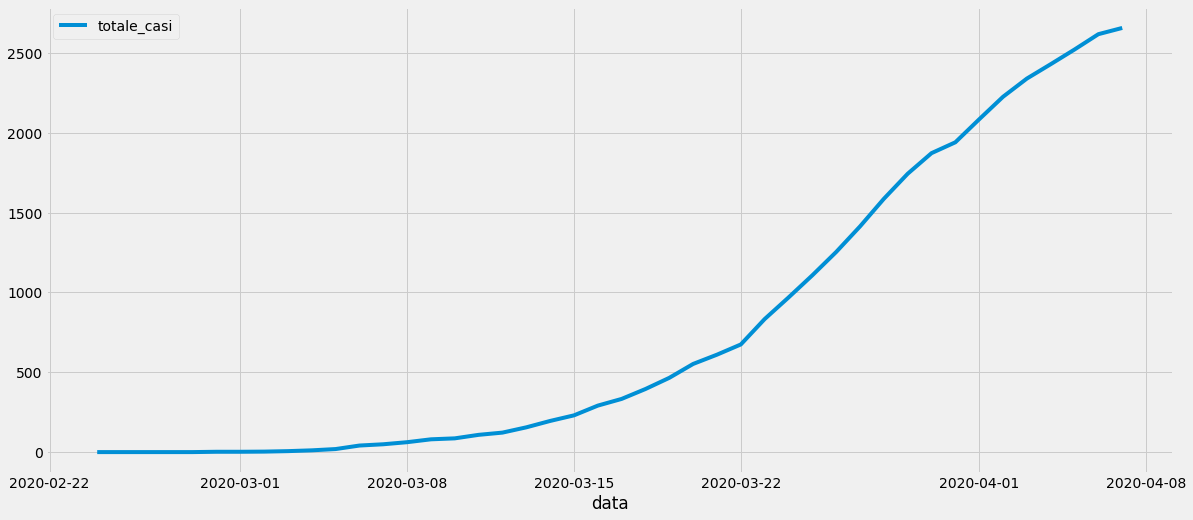

In [0]:
# Pulizia estraiano solo i dati che vogliamo
from matplotlib import style
style.use('fivethirtyeight')
#style.use('ggplot')
df_final = df_choice[["data","totale_casi"]]
df_final.plot(x="data",kind="line",figsize=(18,8))

#### Matplotlib plot

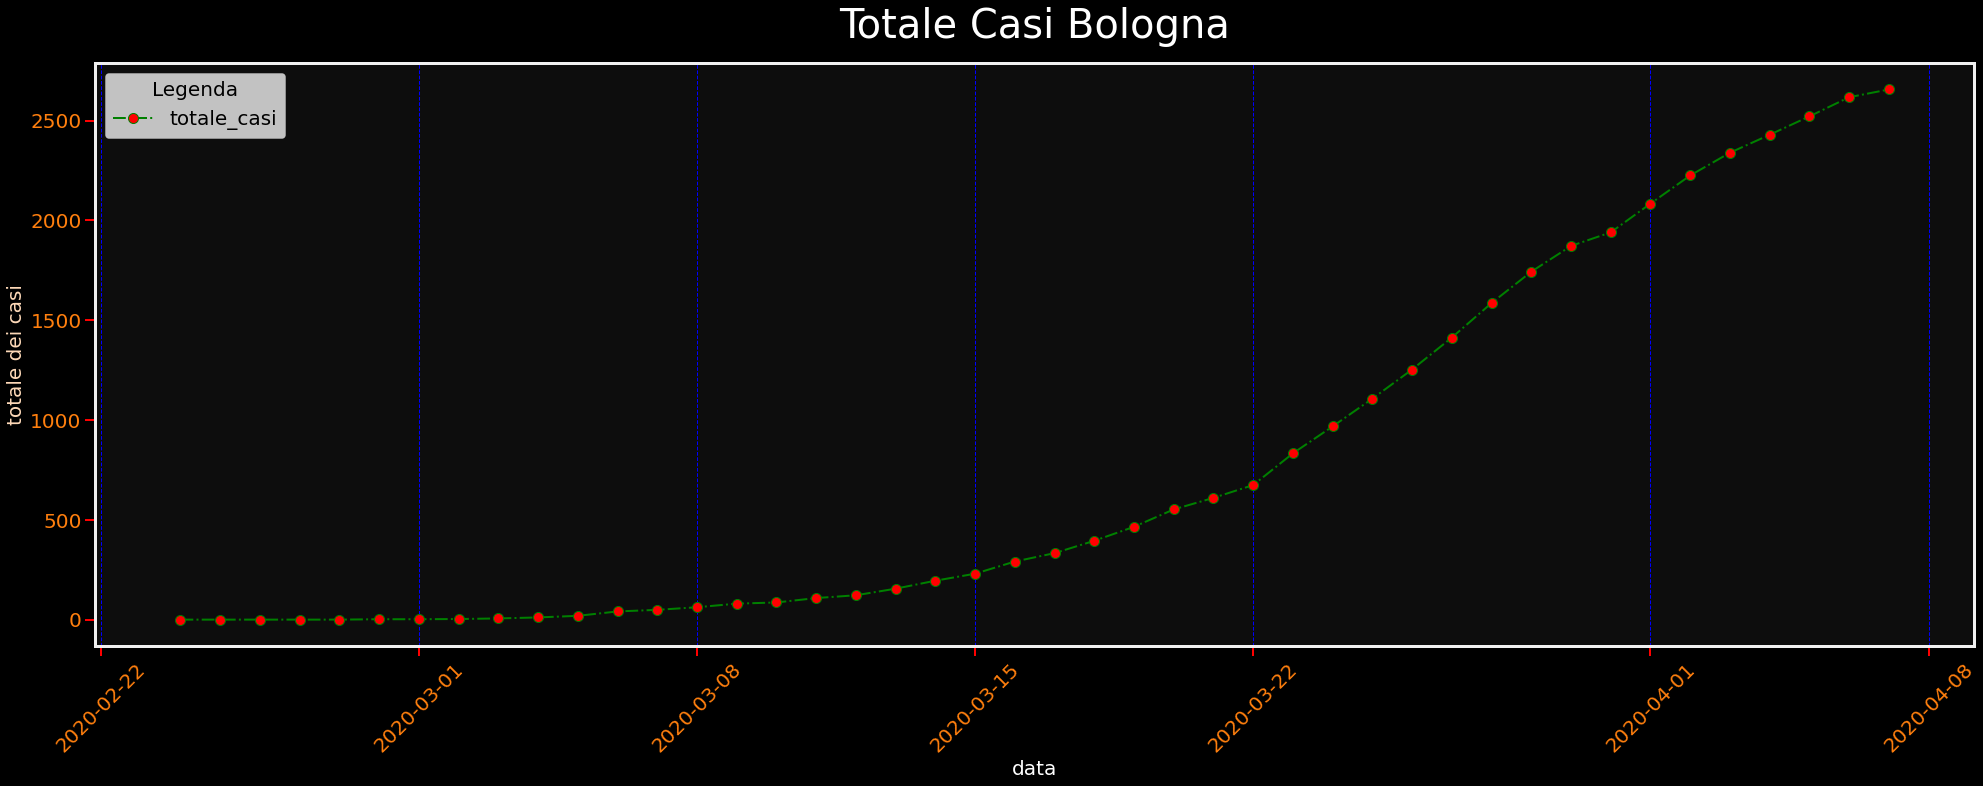

In [0]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# https://www.tutorialspoint.com/matplotlib/index.htm
# plt.style("fiverthirtyeight")

x = df_final["data"].values.tolist()
y = df_final["totale_casi"].values.tolist()

fig, ax = plt.subplots(figsize=(30,10),facecolor=(0, 0, 0))

ax.set_facecolor((0.05,0.05,0.05)) #or use hex values
ax.set_title('Totale Casi Bologna', color=(1,1,1), fontsize='40',pad=25)
ax.set_xlabel('data', color='w',fontsize='20')
ax.set_ylabel('totale dei casi', color='peachpuff',fontsize='20')
ax.tick_params(axis='x' ,direction='out', length=10, width=2, colors='r' ,labelcolor='tab:orange',labelsize=20,labelrotation=45)
ax.tick_params(axis='y' ,direction='out', length=10, width=2, colors='r',labelcolor='tab:orange',labelsize=20)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='b', linestyle='--')
plt.plot(x,y, marker='o', markerfacecolor='r', markersize=10, linestyle='-.', linewidth=2,color='green', label="totale_casi")
ax.legend(loc='best',fontsize=20, title="Legenda", title_fontsize=20)
plt.show()

#### Plotly

In [0]:
# Plotly doc
# Plotly offline figure show
# https://plotly.com/python/reference/

import plotly.graph_objects as go

xx = df_final["data"].values.tolist()
yy = df_final["totale_casi"].values.tolist()

fig = go.Figure()

fig.add_trace(go.Scatter(
        x = xx,
        y = yy,
        name="Totale Casi",
        mode="lines+markers",
        showlegend=True,
        marker=dict(
            symbol="circle-dot",
            size=6,
        ),
        line=dict(
            width=1,
            color="rgb(0,255,0)",
            dash="longdashdot"
        )
    )
)
fig.update_layout(
    title=dict(
        text ="Totale Casi Bologna",
        y = 0.9,
        x = 0.5,
        xanchor = "center",
        yanchor = "top",
    ),
    legend=dict(
        y = 0.9,
        x = 0.03,
    ),
    xaxis_title="data",
    yaxis_title="totale casi",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="orange", #"#7f7f7f", 
    ),
    hovermode='x',  #['x', 'y', 'closest', False]
    plot_bgcolor = "rgb(10,10,10)",
    paper_bgcolor="rgb(0,0,0)"
)
fig.show()


#### Risoluzione con funzioni


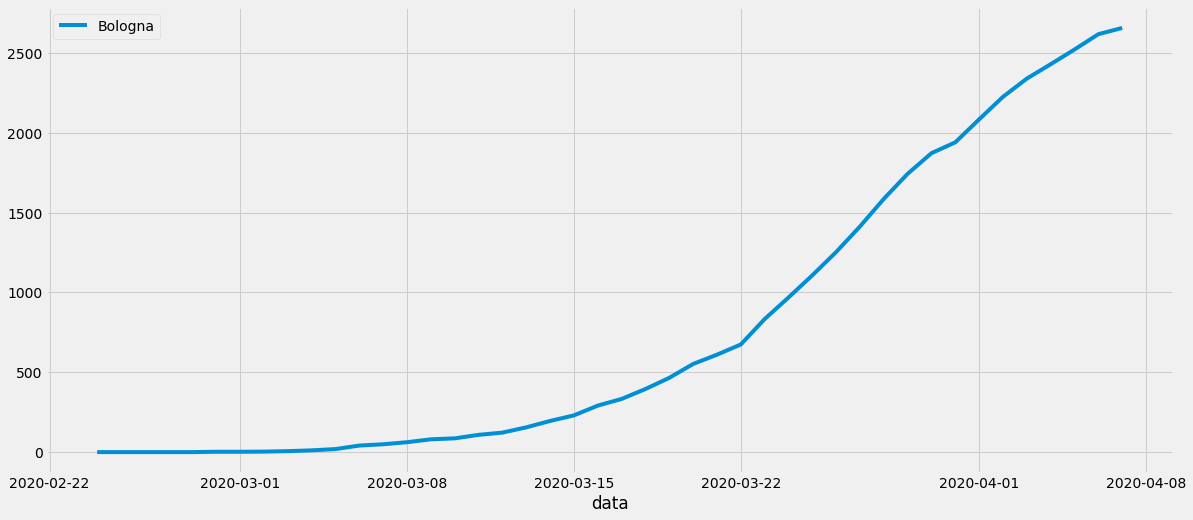

In [0]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

def plot_data_es1(df):
    # Update data for plot
    df["data"] = pd.to_datetime(df_choice["data"]).dt.date
    provincia = list(df["denominazione_provincia"].unique())
    fig, ax = subplots(1, 1, figsize=(18,8))
    df_final = df[["data","totale_casi"]]
    df_final.plot(x="data",kind="line",ax=ax)
    ax.legend(provincia);

def get_data_provincia(df, provincia="Bologna", regione="Emilia-Romagna"):
    # Estrai i dati relativi alla regione=regione e provincia=pronvincia
    df_choice = df[ (df["denominazione_regione"]==regione) & (df["denominazione_provincia"]==provincia)]
    df_fin = df_choice[["data", "denominazione_regione","denominazione_provincia","lat","long","totale_casi"]]
    return df_fin

def es1(df,provincia,regione):
    # Plottare l'andamento nel tempo dei contagiati della propria provincia. 
    # Input proivincia e regione associata alla provincia
    df_fin = get_data_provincia(df, provincia, regione)
    #display(df_fin.tail(4))
    plot_data_es1(df_fin)

df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
provincia="Bologna"
regione="Emilia-Romagna"
es1(df,provincia, regione)

### Parte 2. Comparare l'andamento nel tempo dei contagiati delle prime 3 provincie della nostra regione (Emilia-Romagna) con quelli  di una provincia appartenente sempre alla nostra regione.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



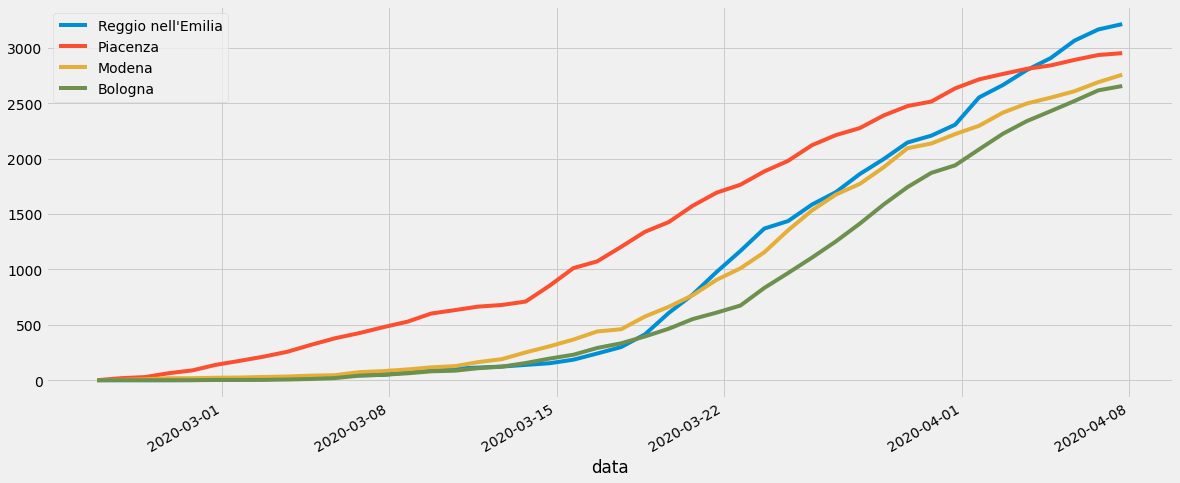

In [0]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

def plot_data_es2(df):
    # Update data for plot
    fig, ax = subplots(1, 1, figsize=(18,8))
    df.plot(x="data",kind="line",ax=ax)

def get_nomi_regioni(df):
    nomi_regioni = list(df["denominazione_regione"].unique())
    nomi_regioni.sort()
    return nomi_regioni

def get_nomi_provincie(df, num, regione="Emilia-Romagna"):
    # Nomi delle prime num provincie per numero di casi 
    ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
    # Dataframe regione scelta e ultima data aggiornamento
    temp = df[(df["denominazione_regione"]==regione) & (df["data"]==ultima_data_aggiornamento)]
    # Ordina dal più grande al più piccolo
    temp.sort_values(by="totale_casi",ascending=False, inplace=True)
    nomi_province = list(temp["denominazione_provincia"][0:num])

    # Nomi pronvicie 
    #nomi_province = list(df["denominazione_provincia"].unique())
    return nomi_province

def es2(df,provincia,regione):
    # Comparare l'andamento nel tempo dei contagiati di ogni provincia della nostra regione (Emilia-Romagna).
    nomi_province = get_nomi_provincie(df, 3, regione)  # Nomi delle prime N provincie per numero di casi 

    # Se la provincia che desidero compare non è tra le prime 3 l'aggiungo
    if provincia not in nomi_province:
        nomi_province.append(provincia)

    #print(nomi_province)
    df_fin_vec = []
    
    data_vec = df
    mydict = {}
    for nome_provincia in nomi_province:
        if nome_provincia!='In fase di definizione/aggiornamento':
            df_fin = get_data_provincia(df, nome_provincia, regione)
            mydict["data"] = list(df_fin["data"])
            mydict[nome_provincia] = list(df_fin["totale_casi"])

    df_fin = pd.DataFrame(mydict)
    df_fin["data"] = pd.to_datetime(df_fin["data"])
    #display(df_fin)
    plot_data_es2(df_fin)


df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
regione="Emilia-Romagna"
provincia="Bologna"
es2(df,provincia,regione)


### Parte 3. Creare un grafico a torta con le percentuali di contagiati per ogni provincia apparente alla nostra regione (Emilia-Romagna)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
5526,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,2656,NaN,NaN
5527,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,38,Ferrara,FE,44.835991,11.618689,522,NaN,NaN
5528,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,40,Forlì-Cesena,FC,44.222686,12.040686,1034,NaN,NaN
5529,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,36,Modena,MO,44.646000,10.926155,2758,NaN,NaN
5530,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,34,Parma,PR,44.801074,10.328350,2365,NaN,NaN
5531,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,33,Piacenza,PC,45.051935,9.692633,2953,NaN,NaN
5532,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,39,Ravenna,RA,44.417225,12.199139,738,NaN,NaN
5533,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,35,Reggio nell'Emilia,RE,44.697353,10.630080,3215,NaN,NaN
5534,2020-04-07T17:00:00,ITA,8,Emilia-Romagna,99,Rimini,RN,44.060901,12.565630,1584,NaN,NaN


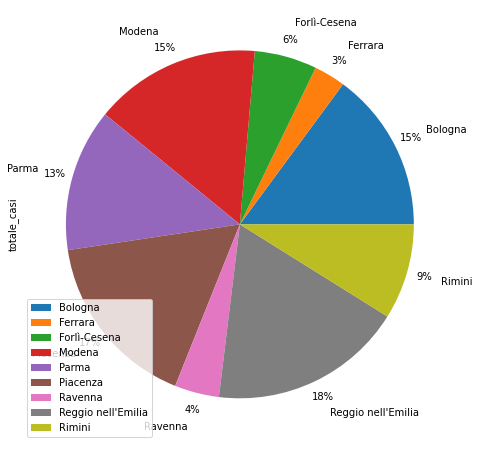

In [5]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


regione="Emilia-Romagna"
provincia="Bologna"
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
df_choice = df[(df["denominazione_regione"]==regione) & (df["denominazione_provincia"]!='In fase di definizione/aggiornamento') & (df["data"]==ultima_data_aggiornamento) ]
display(df_choice)
cont = {
    'totale_casi': list(df_choice["totale_casi"])
    }
df_plot = pd.DataFrame(cont, index=list(df_choice["denominazione_provincia"]) )

fig, ax = plt.subplots(1, 1, figsize=(18,8))
df_plot.plot(kind="pie", y="totale_casi",ax=ax,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
#fig.savefig("covid19.png")    